In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment2/'
FOLDERNAME = 'CS236_final_project'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/CS236_final_project


In [ ]:
# instantiate pytorch and huggingface
# Only needs to be called once, will just load from google drive in the future
! pip install transformers
! pip install datasets
from datasets import load_dataset
dataset = dataset = load_dataset("huggan/wikiart")
dataset.save_to_disk('wikiart')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 116.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.7 MB/s eta 0:00:00


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/81444 [00:00<?, ? examples/s]

Saving the dataset (0/68 shards):   0%|          | 0/81444 [00:00<?, ? examples/s]

In [ ]:
dataset.save_to_disk('wikiart')

Saving the dataset (0/68 shards):   0%|          | 0/81444 [00:00<?, ? examples/s]

In [ ]:
# load the dataset
! pip install datasets
from datasets import load_from_disk
dataset = load_from_disk('wikiart')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np

USE_GPU = True
dtype = torch.float32 # We will be using float throughout this tutorial.

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss.
print_every = 100
print('using device:', device)

using device: cuda


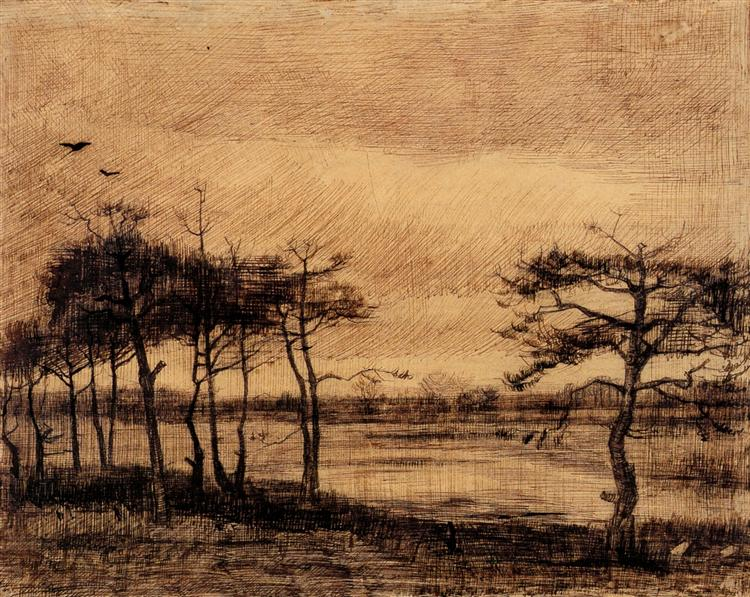

In [ ]:
dataset['train'][0]['image']

In [ ]:
train_dataset = dataset['train']
train_dataset.set_format(type='torch', columns=['image', 'artist', 'genre', 'style'])

In [ ]:
train_dataset[0]['image'].size()

torch.Size([597, 750, 3])

In [ ]:
import json
file_path = 'dataset_infos.json'

# Open the file and parse the JSON content
with open(file_path, 'r') as file:
    data_dict = json.load(file)

# Now data_dict is a Python dictionary containing the data from the JSON file
print(data_dict)

{'huggan--wikiart': {'description': 'Dataset containing 81444 pieces of visual art from various artists, taken from WikiArt.org,\nalong with class labels for each image :\n\n\t* "artist" : 129 artist classes, including a "Unknown Artist" class\n\t* "genre" : 11 genre classes, including a "Unknown Genre" class\n\t* "style" : 27 style classes\n\nOn WikiArt.org, the description for the "Artworks by Genre" page reads :\nA genre system divides artworks according to depicted themes and objects. A classical hierarchy of genres was developed in European culture by the 17th century. It ranked genres in high – history painting and portrait, - and low – genre painting, landscape and still life. This hierarchy was based on the notion of man as the measure of all things. Landscape and still life were the lowest because they did not involve human subject matter. History was highest because it dealt with the noblest events of humanity. Genre system is not so much relevant for a contemporary art; ther

In [ ]:
data_dict['huggan--wikiart']['features'].keys()
features = data_dict['huggan--wikiart']['features']
artists = features['artist']['names']
genres = features['genre']['names']
styles = features['style']['names']

In [ ]:
genres

['abstract_painting',
 'cityscape',
 'genre_painting',
 'illustration',
 'landscape',
 'nude_painting',
 'portrait',
 'religious_painting',
 'sketch_and_study',
 'still_life',
 'Unknown Genre']

In [ ]:
styles

['Abstract_Expressionism',
 'Action_painting',
 'Analytical_Cubism',
 'Art_Nouveau',
 'Baroque',
 'Color_Field_Painting',
 'Contemporary_Realism',
 'Cubism',
 'Early_Renaissance',
 'Expressionism',
 'Fauvism',
 'High_Renaissance',
 'Impressionism',
 'Mannerism_Late_Renaissance',
 'Minimalism',
 'Naive_Art_Primitivism',
 'New_Realism',
 'Northern_Renaissance',
 'Pointillism',
 'Pop_Art',
 'Post_Impressionism',
 'Realism',
 'Rococo',
 'Romanticism',
 'Symbolism',
 'Synthetic_Cubism',
 'Ukiyo_e']

In [ ]:
lora_dataset_indices = []
counter = 100
i = 0
while counter >= 0:
    if train_dataset[i]['style'] in [2, 7, 25]:
        lora_dataset_indices.append(i)
        # print("appending " + str(i) + "to dataset")
        counter -= 1
    i += 1

print(lora_dataset_indices)

[99, 103, 108, 149, 159, 184, 189, 201, 206, 212, 217, 260, 293, 302, 303, 315, 331, 364, 372, 460, 465, 505, 536, 542, 567, 605, 636, 647, 697, 754, 810, 826, 831, 838, 843, 867, 900, 947, 960, 1074, 1091, 1099, 1128, 1208, 1212, 1314, 1380, 1392, 1415, 1419, 1426, 1435, 1459, 1480, 1485, 1516, 1659, 1662, 1773, 1789, 1822, 1881, 1918, 1965, 1975, 1993, 2009, 2013, 2023, 2035, 2096, 2111, 2124, 2152, 2223, 2229, 2413, 2429, 2510, 2514, 2585, 2602, 2686, 2744, 2782, 2785, 2809, 2824, 2858, 2923, 2951, 2954, 2981, 3001, 3075, 3078, 3140, 3187, 3189, 3229, 3268]


In [ ]:
lora_dataset_indices = []
counter = 5000
i = 0
while i < 81444:
    if train_dataset[i]['style'] in [2, 7, 25]:
        lora_dataset_indices.append(i)
        # print("appending " + str(i) + "to dataset")
        counter -= 1
    i += 1

print(lora_dataset_indices)

KeyboardInterrupt: ignored

In [ ]:
lora_dataset = train_dataset.select(lora_dataset_indices)
lora_dataset.save_to_disk('Cubism_dataset')

Saving the dataset (0/1 shards):   0%|          | 0/101 [00:00<?, ? examples/s]

In [ ]:
def generate_natural_language(artist, genre, style):
    statement = f"An art piece about the {genres[genre]} genre, with {styles[style]} style, painted by artist {artists[artist]}"
    return statement

generate_natural_language(train_dataset[0]['artist'], train_dataset[0]['genre'], train_dataset[0]['style'])

'An art piece about the landscape genre, with Realism style, painted by artist vincent-van-gogh'

In [ ]:
def generate_natural_language(entry):
    artist = entry['artist']
    genre = entry['genre']
    style = entry['style']
    description = f"An art piece about the {genres[genre]} genre, with {styles[style]} style, painted by artist {artists[artist]}"
    return {'description': description}

#lora_dataset = lora_dataset.map(generate_natural_language)
train_dataset = train_dataset.map(generate_natural_language)

Map:   0%|          | 0/81444 [00:00<?, ? examples/s]

In [ ]:
train_dataset.save_to_disk('Wikiart_with_description')

Saving the dataset (0/68 shards):   0%|          | 0/81444 [00:00<?, ? examples/s]

In [ ]:
! pip install datasets
from datasets import load_from_disk
lora_dataset = load_from_disk('Cubism_dataset')

In [ ]:
lora_dataset[0]['image'].size()

torch.Size([1382, 1669, 3])

In [ ]:
import torch
import numpy as np
from torchvision.transforms import Resize

# Assuming your original dataset is 'original_dataset'
# And 'image_tensor' is the key for your image tensors

# Initialize an empty list to store the updated data
updated_data = []

# Define the resize transformation
resize_transform = Resize((512, 512))

for item in lora_dataset:
    # Extract the image tensor
    image_tensor = np.array(item['image'])
    image_tensor = torch.Tensor(np.transpose(image_tensor, (2, 0, 1)))

    # Resize the image tensor and perform any other required transformations
    resized_tensor = torch.Tensor(resize_transform(image_tensor))

    # Create a new dictionary with the updated information
    updated_item = dict()  # Copy other fields from the original item
    updated_item['descripton'] = item['description']  # Copy the description
    updated_item['artist'] = item['artist']  # Copy the artist
    updated_item['genre'] = item['genre']  # Copy the genre
    updated_item['style'] = item['style']  # Copy the style
    updated_item['image'] = resized_tensor  # Update the image tensor

    # Add the updated item to the new list
    updated_data.append(updated_item)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
from datasets import Dataset
import pandas as pd

# Convert the list of dictionaries into a Hugging Face Dataset
data_dict = {key: [dic[key] for dic in updated_data] for key in updated_data[0]}

In [ ]:
new_lora_dataset = Dataset.from_dict(data_dict)

In [ ]:
new_lora_dataset.set_format(type='torch', columns=['image', 'artist', 'genre', 'style'])

In [ ]:
new_lora_dataset[0]['image'].size()

torch.Size([3, 512, 512])

In [ ]:
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def save_tensor(dataset):
  for i in range(len(dataset)):
      image_tensor = dataset[i]['image']
      image_name = 'Cubism_image_' + str(i)
      image_description = dataset[i]['description']
      # Check if the tensor is on GPU and move it to CPU if necessary
      if image_tensor.is_cuda:
          image_tensor = image_tensor.cpu()

      # Convert to NumPy array
      image_np = image_tensor.numpy()

      # Change the shape from (C, H, W) to (H, W, C)
      if image_np.shape[0] == 3:  # assuming 3 channels (RGB)
          image_np = np.transpose(image_np, (1, 2, 0)).astype(np.uint8)

      # Convert to PIL Image
      img = Image.fromarray(image_np)
      directory = '/content/drive/My Drive/Loras/Lora_on_WikiArt/dataset/' + image_name
      img.save(directory+'.jpg')
      with open(directory+'.txt', 'w') as f:
        f.write(image_description)


save_tensor(lora_dataset)

In [ ]:
lora_dataset[3]['description']

'An art piece about the landscape genre, with Cubism style, painted by artist paul-cezanne'

In [ ]:
! pip install datasets
from datasets import load_from_disk
lora_dataset = load_from_disk('Cubism')

In [ ]:
lora_dataset[0].keys()

dict_keys(['artist', 'genre', 'style', 'image', 'description'])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from torchvision.models import vgg19, VGG19_Weights

import copy

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no GPU

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader("Paul_Cezanne.jpg")
content_img = image_loader("Hoover_tower.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

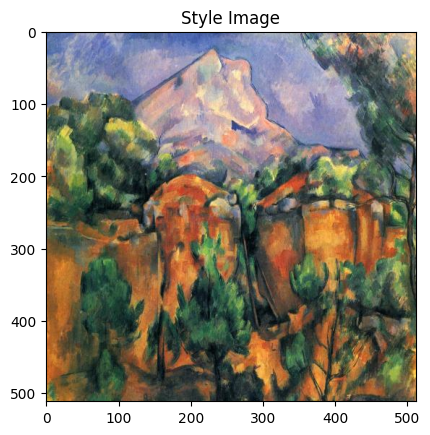

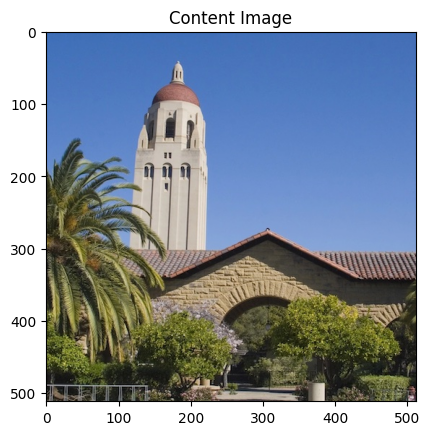

In [ ]:
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [ ]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        # we 'detach' the target content from the tree used
        # to dynamically compute the gradient: this is a stated value,
        # not a variable. Otherwise the forward method of the criterion
        # will throw an error.
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

In [ ]:
def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resize F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

In [ ]:
cnn = torch.load(PATH).to(device)

In [ ]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406])
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225])

# create a module to normalize input image so we can easily put it in a
# ``nn.Sequential``
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
        self.std = torch.tensor(std).view(-1, 1, 1).to(device)

    def forward(self, img):
        # normalize ``img``
        return (img - self.mean) / self.std

In [ ]:
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # normalization module
    normalization = Normalization(normalization_mean, normalization_std)

    # just in order to have an iterable access to or list of content/style
    # losses
    content_losses = []
    style_losses = []

    # assuming that ``cnn`` is a ``nn.Sequential``, so we make a new ``nn.Sequential``
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ``ContentLoss``
            # and ``StyleLoss`` we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

In [ ]:
def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.LBFGS([input_img])
    return optimizer

def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)

    # We want to optimize the input and not the model parameters so we
    # update all the requires_grad fields accordingly
    input_img.requires_grad_(True)
    # We also put the model in evaluation mode, so that specific layers
    # such as dropout or batch normalization layers behave correctly.
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # correct the values of updated input image
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # a last correction...
    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img